<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/Role_of_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
%matplotlib inline

import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time
from sklearn.cluster import DBSCAN
from collections import OrderedDict
from sklearn.neighbors import NearestNeighbors
from   tqdm       import tqdm
from pylab import cm
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial import distance
from scipy.spatial import distance_matrix
from scipy.stats import special_ortho_group
import numpy as np
import seaborn    as sns
import pandas     as pd
from numpy import cos, sin, pi, random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
plt.rcParams['font.size'] = 14
mycmap = ListedColormap(["blue","red","gold" ])
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]


!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


In [38]:
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)
        if yu == -1:
          ax.scatter(X[pos,0], X[pos,1], c='k', s = 10, marker = "x")
        else:
          ax.scatter(X[pos,0], X[pos,1], 
                     c=cpalette[i%len(cpalette)], s= 10, marker = "o")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')



First Part. In each sample increase the number of dimensions from 3 to L>3, by introducing L-3
additional dimensions with noisy inputs. Study how visualization with t-SNE and clustering
with DBSCAN are affected by this increase in dimensionality.

Who aim to increase the dimension of the data incur in various phenomena know under the name of "Curse of Dimesionality", when dimensionality increases, the volume of the space increases so fast that the available data become sparse. In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.

N= 1000   D= 3
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 10
49.00227305367713
[49, 98, 147, 196, 245]
82.6948981318533
[82, 164, 246, 328, 410]
117.32971413328296
[117, 234, 351, 468, 585]
149.19467601668444
[149, 298, 447, 596, 745]
175.0112023653065
[175, 350, 525, 700, 875]


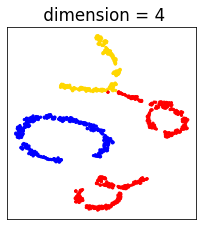

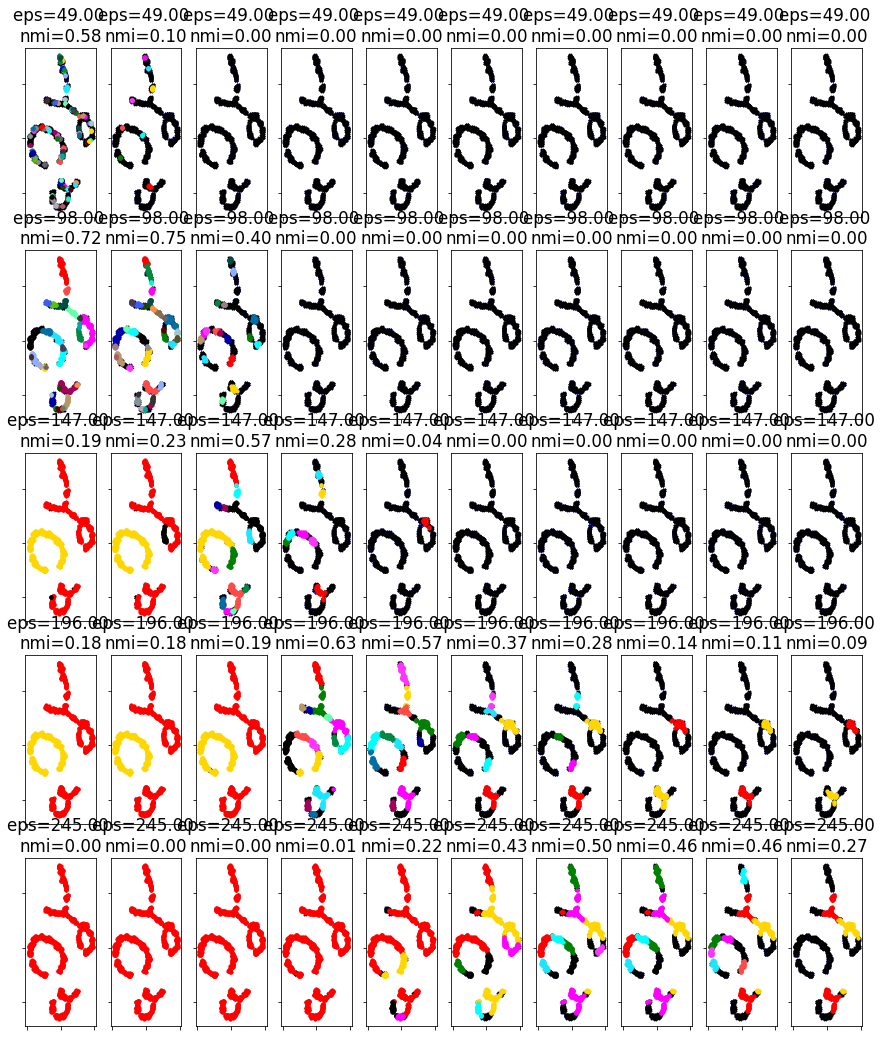

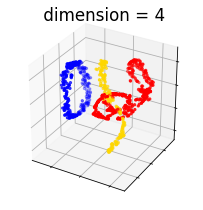

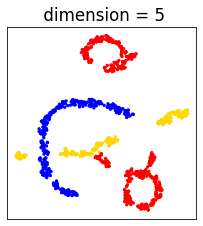

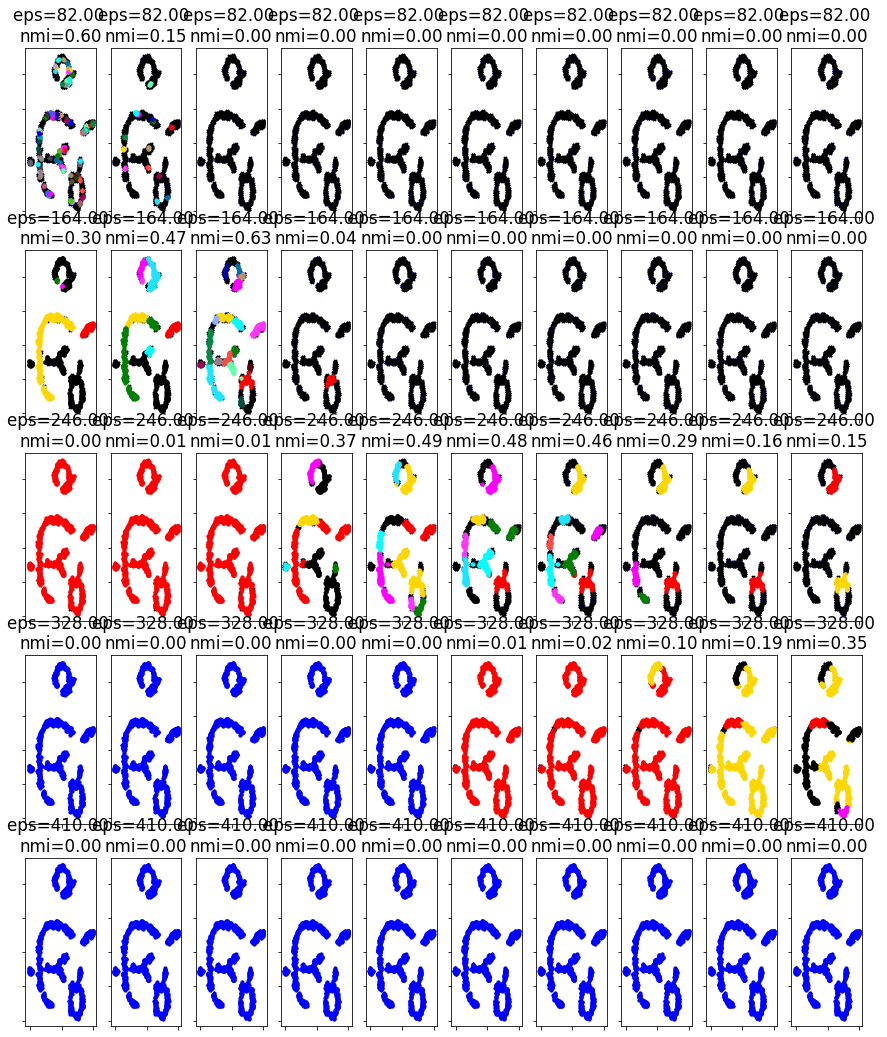

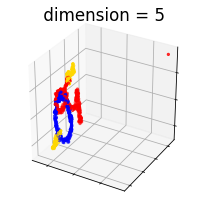

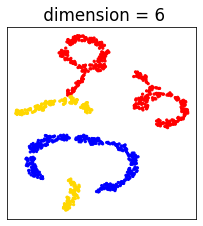

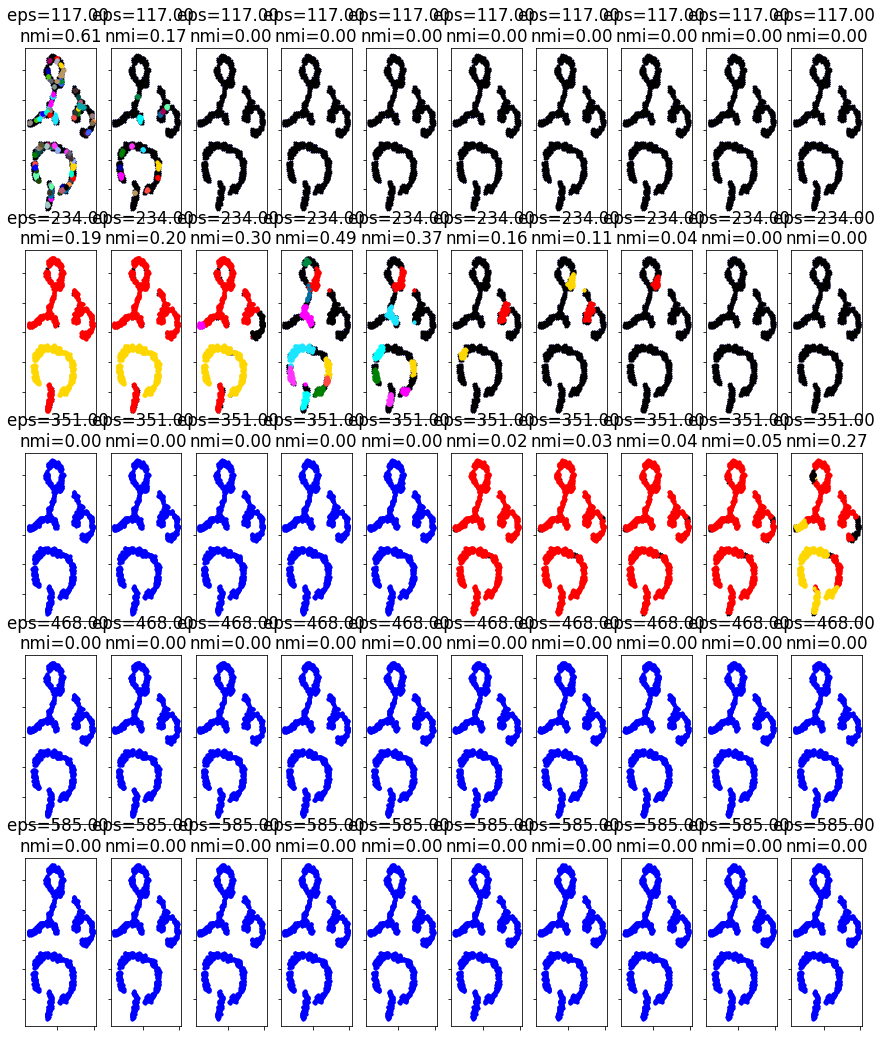

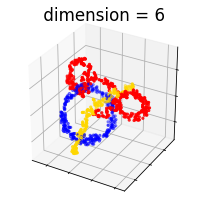

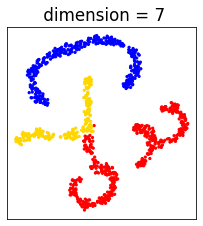

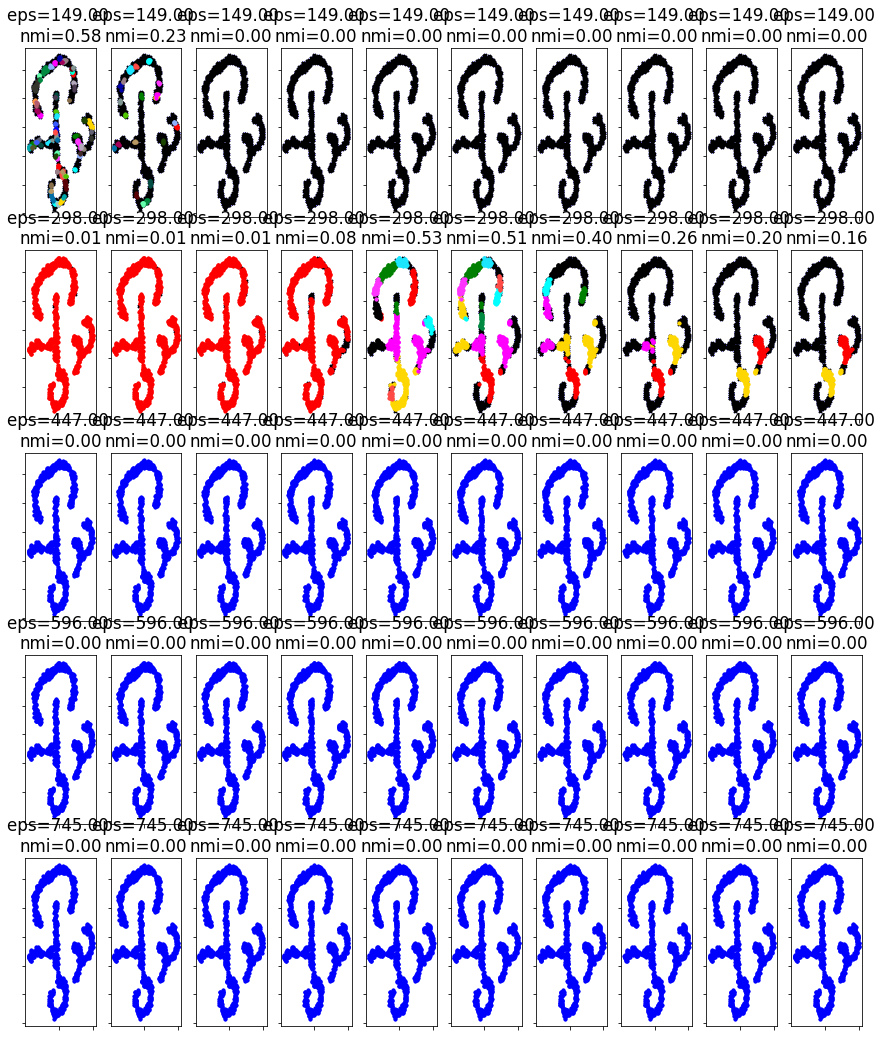

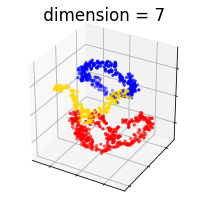

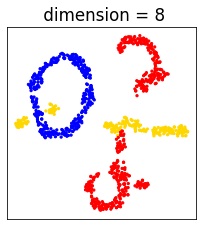

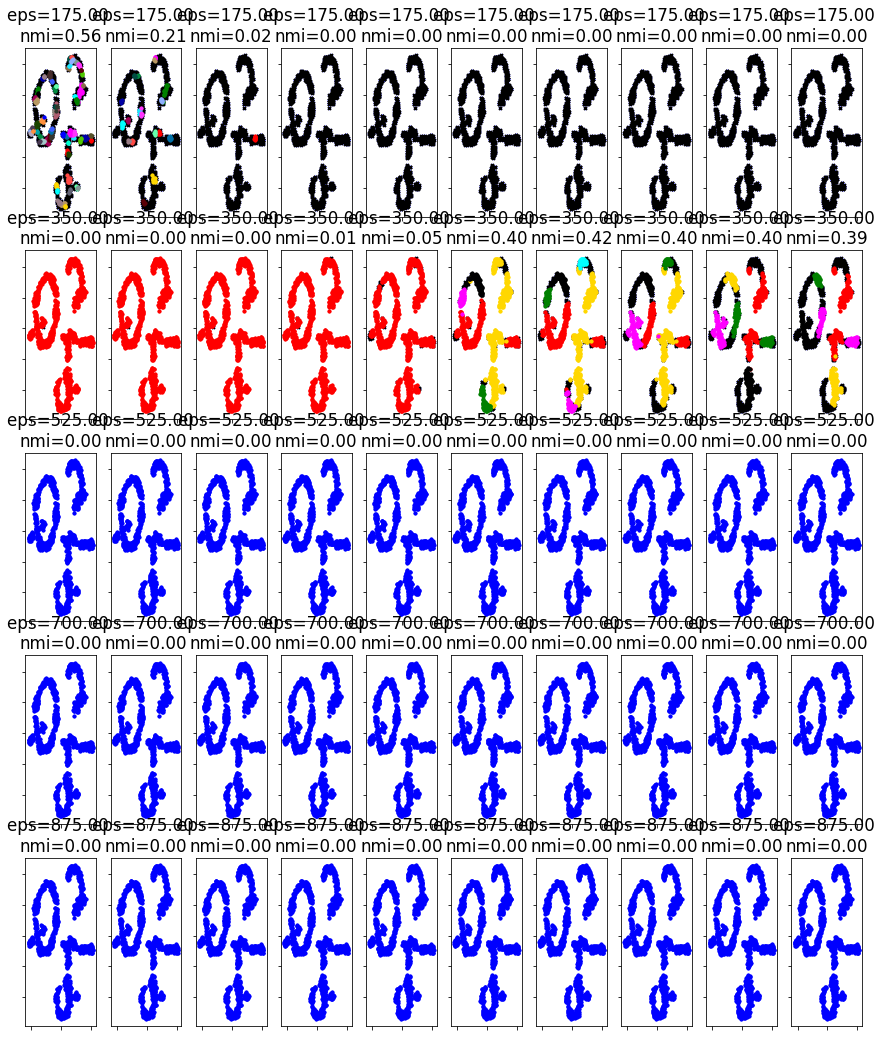

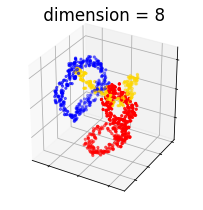

In [88]:
#define function which take in input the original data and an integer L and
#returns x values with noise in the extra dimensions (L)
def dimensional_increase(x, L, noise=100):
    x_new = np.random.normal(loc = 0, size = (x.shape[0], x.shape[1]+L ), scale = noise)
    x_new[:,0:x.shape[1]] = x
    return x_new

#load old data
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)  # number of data samples
D=len(data[0])
print("N=",N,"  D=",D)

# increase dimension
np.random.seed(12345)
L_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
last=L_list[-1]
print(L_list, last)
eps_range = [150, 200, 250, 280, 310] #minimum distance between points increase in higher dimensions
min_sample_range = [3,5,10,20,24,28,31,34,37,39] 
n_component=2
perplexity=20
ar_mean_min_dist = {}

for i, (d, e, m) in enumerate(zip(L_list, eps_range, min_sample_range)):

  #generate data
  new_data = dimensional_increase(data, d)

  #-------------------------
  #distance computation
  x = new_data #[d]
  dist_matr = distance_matrix(x, x)
  np.fill_diagonal(dist_matr, np.inf)
  ar_mean_min_dist[d] = dist_matr.min(axis=0).mean()
  print(ar_mean_min_dist[d])
  r = int(ar_mean_min_dist[d])
  eps_range_1 = [r,2*r,3*r,4*r,5*r]
  print(eps_range_1)
  #-------------------------

  ax = plt.figure(figsize=(4*last, 3*4)).add_subplot(3, last, i+1)

  tsne = manifold.TSNE(n_components=n_component, init='random',
                         random_state=0, perplexity=perplexity)
  Y = tsne.fit_transform(new_data)
  
  ax.set_title(f" dimension = {d+3}")
  ax.scatter(Y[:, 0], Y[:, 1], s = 5, c=y,cmap=mycmap, marker = 'o')
  ax.tick_params(left=False,bottom=False)
  ax.xaxis.set_major_formatter(NullFormatter())
  ax.yaxis.set_major_formatter(NullFormatter())
  ax.axis('tight')

  #ax = plt.figure(figsize=(4*10, 3*4)).add_subplot(3,last, last + i+1)
  fig, ax = plt.subplots(len(eps_range_1),len(min_sample_range),figsize=(15,18))
  for i, e_1 in enumerate(eps_range_1):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=e_1, min_samples=min_samples)
        model.fit(new_data)
        y_hat = model.labels_
        plotting_ax(Y,y_hat,ax[i,j])
        nmi=NMI(y_hat,Y)
        ax[i,j].set_title('eps=%.2f \nnmi=%.2f'%(e_1,nmi))


  ax = plt.figure(figsize=(4*10, 3*4)).add_subplot(3, last, 2*last +i +1, projection = '3d')

  tsne = manifold.TSNE(n_components = 3, init='random',
                         random_state=0, perplexity= 20)
  
  Y = tsne.fit_transform(new_data)
  
  ax.set_title(f" dimension = {d+3}")
  ax.scatter(Y[:,0], Y[:,1],Y[:,2], s = 5, depthshade=True, c=y, cmap=mycmap, marker = 'o')
  ax.xaxis.set_major_formatter(NullFormatter())
  ax.yaxis.set_major_formatter(NullFormatter())
  ax.zaxis.set_major_formatter(NullFormatter())
  ax.axis('tight')

  
plt.tight_layout 
plt.show()
        




Second Part. To mix the information between all L dimensions while preserving the distances between
points, one can also perform some rotation of data with orthonormal random matrices M in
O(L): x → M.x

49.002273053677136
82.29167297224822
115.69452036699242
148.34103653642552
176.43242033520852


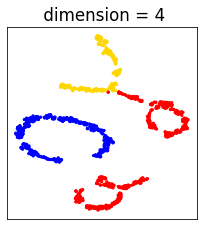

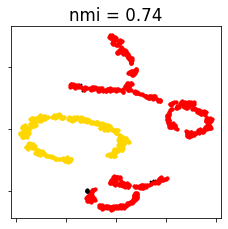

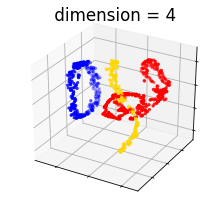

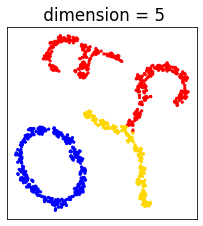

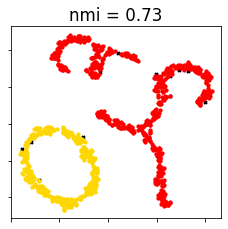

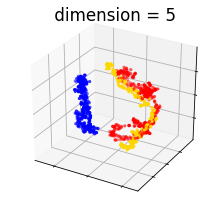

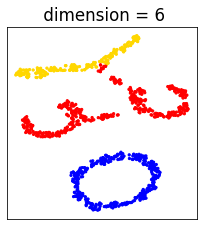

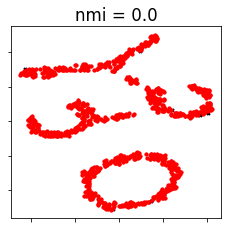

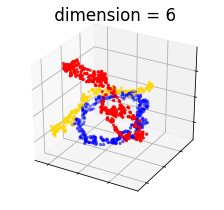

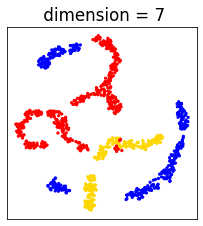

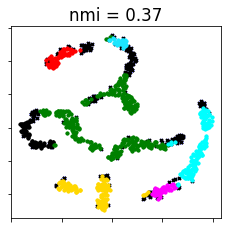

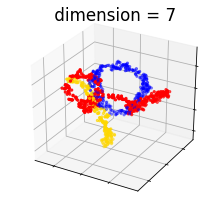

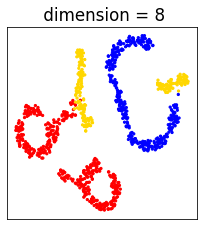

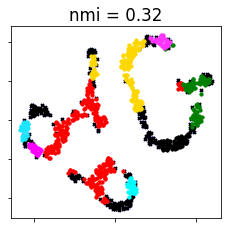

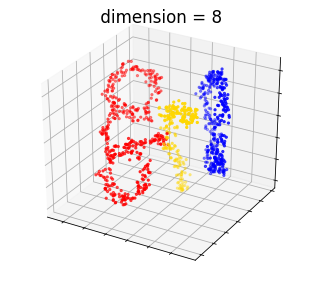

In [87]:
#new function for dimensional increase and rotation feature
def dim_increase_rotate(x, L, noise=100):
    x_new = np.random.normal(loc = 0, size = (x.shape[0], x.shape[1]+L ), scale = noise)
    x_new[:,0:x.shape[1]] = x
    x_new = x_new@special_ortho_group.rvs(x.shape[1] + L)
    return x_new

# increase dimension
np.random.seed(12345)
L_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
last=L_list[-1]
eps_range = [150, 200, 250, 280, 310]
min_sample_range = [3,5,10,20,24,28,31,34,37]
n_component=2
perplexity=20



for i, (d, e, m) in enumerate(zip(L_list, eps_range, min_sample_range)):

  new_data = dim_increase_rotate(data, d)
  #-------------------------
  #distance computation
  x = new_data #[d]
  dist_matr = distance_matrix(x, x)
  np.fill_diagonal(dist_matr, np.inf)
  ar_mean_min_dist[d] = dist_matr.min(axis=0).mean()
  print(ar_mean_min_dist[d])
  r = int(ar_mean_min_dist[d])
  eps_range = [r,3*r,6*r,9*r,12*r]
  #-------------------------

  ax = plt.figure(figsize=(4*last, 3*4)).add_subplot(3, last, i+1)

  tsne = manifold.TSNE(n_components=n_component, init='random',
                         random_state=0, perplexity=perplexity)
  Y = tsne.fit_transform(new_data)
  
  ax.set_title(f" dimension = {d+3}")
  ax.scatter(Y[:, 0], Y[:, 1], s = 5, c=y,cmap=mycmap, marker = 'o')
  ax.tick_params(left=False,bottom=False)
  ax.xaxis.set_major_formatter(NullFormatter())
  ax.yaxis.set_major_formatter(NullFormatter())
  ax.axis('tight')


  ax = plt.figure(figsize=(4*10, 3*4)).add_subplot(3,last, last + i+1)

  model = DBSCAN(eps=e, min_samples=m)
  model.fit(new_data)
  y_hat = model.labels_
  nmi=NMI(y_hat, y)
  plotting_ax(Y,y_hat,ax)
  ax.set_title(f"nmi = {round(nmi,2)}")
  ax = plt.figure(figsize=(4*10, 3*4)).add_subplot(3, last, 2*last +i +1, projection = '3d')

  tsne = manifold.TSNE(n_components = 3, init='random',
                         random_state=0, perplexity= 20)
  
  Y = tsne.fit_transform(new_data)
  
  ax.set_title(f" dimension = {d+3}")
  ax.scatter(Y[:,0], Y[:,1],Y[:,2], s = 5, depthshade=True, c=y, cmap=mycmap, marker = 'o')
  ax.xaxis.set_major_formatter(NullFormatter())
  ax.yaxis.set_major_formatter(NullFormatter())
  ax.zaxis.set_major_formatter(NullFormatter())
  ax.axis('tight')


  
plt.tight_layout(h_pad=0.5)
plt.show()

Some explanations, dimension increase puts a strain on the ability of tSNE-visualization to clearly separate different data types. Rotating the data let the tSNE initially perform better in lower increased dimensions but it does not change the whole performance along the entire experimentation.
As one can see using data post t-SNE processing let DBSCAN work and it can remove noisy points and isolate clusters, the major treat is given by the tuning of the eps parameter which is definitely affected by the dimensional increase process.

